# Customer Transaction Prediction

## Introduction 

This project focuses on building a machine learning model to predict whether a bank customer is likely to make a financial transaction in the future. The dataset provided contains anonymized features for each customer, along with a target variable indicating whether a transaction occurred.

## Objective

- Develop a binary classification model to predict customer transactions.

- Use predictive modeling to support targeted marketing, customer engagement, and resource optimization.

- Identify the best-performing model among several machine learning algorithms.

## Problem Statement 

The aim of this project is to build a predictive model that identifies whether a customer will make a transaction in the future. The dataset contains anonymized customer records, each with 200 numerical features and a binary target variable:

- target = 1 --> Customer will make a transaction

- target = 0 --> Customer will not make a transaction

The challenge is to train and evaluate machine learning models that can accurately classify these customers. The bank will use this prediction system to prioritize high-value customers, optimize marketing strategies, and improve customer engagement.

## Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

## Data Loading 

In [2]:
data = pd.read_csv(r'C:\Users\rajit\Downloads\PRCP-1003-CustTransPred\Data\train(1).csv')
data

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,4.6667,3.8743,-5.2387,7.3746,11.5767,12.0446,11.6418,-7.0170,5.9226,-14.2136,16.0283,5.3253,12.9194,29.0460,-0.6940,5.1736,-0.7474,14.8322,11.2668,5.3822,2.0183,10.1166,16.1828,4.9590,2.0771,-0.2154,8.6748,9.5319,5.8056,22.4321,5.0109,-4.7010,21.6374,0.5663,5.1999,8.8600,43.1127,18.3816,-2.3440,23.4104,6.5199,12.1983,13.6468,13.8372,1.3675,2.9423,-4.5213,21.4669,9.3225,16.4597,7.9984,-1.7069,-21.4494,6.7806,11.0924,9.9913,14.8421,0.1812,8.9642,16.2572,2.1743,-3.4132,9.4763,13.3102,26.5376,1.4403,14.7100,6.0454,9.5426,17.1554,14.1104,24.3627,2.0323,6.7602,3.9141,-0.4851,2.5240,1.5093,2.5516,15.5752,-13.4221,7.2739,16.0094,9.7268,0.8897,0.7754,4.2218,12.0039,13.8571,-0.7338,-1.9245,15.4462,12.8287,0.3587,9.6508,6.5674,5.1726,3.1345,29.4547,31.4045,2.8279,15.6599,8.3307,-5.6011,19.0614,11.2663,8.6989,8.3694,11.5659,-16.4727,4.0288,17.9244,18.5177,10.7800,9.0056,16.6964,10.4838,1.6573,12.1749,-13.1324,17.6054,11.5423,15.4576,5.3133,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,10.8160,3.6783,-11.1147,1.8730,9.8775,11.7842,1.2444,-47.3797,7.3718,0.1948,34.4014,25.7037,11.8343,13.2256,-4.1083,6.6885,-8.0946,18.5995,19.3219,7.0118,1.9210,8.8682,8.0109,-7.2417,1.7944,-1.3147,8.1042,1.5365,5.4007,7.9344,5.0220,2.2302,40.5632,0.5134,3.1701,20.1068,7.7841,7.0529,3.2709,23.4822,5.5075,13.7814,2.5462,18.1782,0.3683,-4.8210,-5.4850,13.7867,-13.5901,11.0993,7.9022,12.2301,0.4768,6.8852,8.0905,10.9631,11.7569,-1.2722,24.7876,26.6881,1.8944,0.6939,-13.6950,8.4068,35.4734,1.7093,15.1866,2.6227,7.3412,32.0888,13.9550,13.0858,6.6203,7.1051,5.3523,8.5426,3.6159,4.1569,3.0454,7.8522,-11.5100,7.5109,31.5899,9.5018,8.2736,10.1633,0.1225,12.5942,14.5697

## Basic Checks

In [3]:
data.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,4.6667,3.8743,-5.2387,7.3746,11.5767,12.0446,11.6418,-7.0170,5.9226,-14.2136,16.0283,5.3253,12.9194,29.0460,-0.6940,5.1736,-0.7474,14.8322,11.2668,5.3822,2.0183,10.1166,16.1828,4.9590,2.0771,-0.2154,8.6748,9.5319,5.8056,22.4321,5.0109,-4.7010,21.6374,0.5663,5.1999,8.8600,43.1127,18.3816,-2.3440,23.4104,6.5199,12.1983,13.6468,13.8372,1.3675,2.9423,-4.5213,21.4669,9.3225,16.4597,7.9984,-1.7069,-21.4494,6.7806,11.0924,9.9913,14.8421,0.1812,8.9642,16.2572,2.1743,-3.4132,9.4763,13.3102,26.5376,1.4403,14.7100,6.0454,9.5426,17.1554,14.1104,24.3627,2.0323,6.7602,3.9141,-0.4851,2.5240,1.5093,2.5516,15.5752,-13.4221,7.2739,16.0094,9.7268,0.8897,0.7754,4.2218,12.0039,13.8571,-0.7338,-1.9245,15.4462,12.8287,0.3587,9.6508,6.5674,5.1726,3.1345,29.4547,31.4045,2.8279,15.6599,8.3307,-5.6011,19.0614,11.2663,8.6989,8.3694,11.5659,-16.4727,4.0288,17.9244,18.5177,10.7800,9.0056,16.6964,10.4838,1.6573,12.1749,-13.1324,17.6054,11.5423,15.4576,5.3133,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,10.8160,3.6783,-11.1147,1.8730,9.8775,11.7842,1.2444,-47.3797,7.3718,0.1948,34.4014,25.7037,11.8343,13.2256,-4.1083,6.6885,-8.0946,18.5995,19.3219,7.0118,1.9210,8.8682,8.0109,-7.2417,1.7944,-1.3147,8.1042,1.5365,5.4007,7.9344,5.0220,2.2302,40.5632,0.5134,3.1701,20.1068,7.7841,7.0529,3.2709,23.4822,5.5075,13.7814,2.5462,18.1782,0.3683,-4.8210,-5.4850,13.7867,-13.5901,11.0993,7.9022,12.2301,0.4768,6.8852,8.0905,10.9631,11.7569,-1.2722,24.7876,26.6881,1.8944,0.6939,-13.6950,8.4068,35.4734,1.7093,15.1866,2.6227,7.3412,32.0888,13.9550,13.0858,6.6203,7.1051,5.3523,8.5426,3.6159,4.1569,3.0454,7.8522,-11.5100,7.5109,31.5899,9.5018,8.2736,10.1633,0.1225,12.5942,14.5697

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [5]:
data.tail()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
199995,train_199995,0,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,-0.6209,5.6669,3.7574,-9.5348,13.9860,5.2982,8.2705,14.1527,7.4540,-5.0105,12.0465,8.6349,9.9137,25.1376,1.0914,3.2326,7.7802,13.9939,2.9085,0.1005,4.2369,7.5665,-9.2149,9.5746,1.4012,7.4211,11.0075,7.8080,4.5567,4.9861,9.7471,0.0722,5.9053,8.1743,10.8800,11.1665,4.2600,-2.1296,8.7833,-15.5727,-8.4916,22.1905,12.4110,15.1168,1.6041,6.1868,10.9576,18.7371,15.2986,5.7322,5.1244,9.8225,14.0315,-23.6064,-1.3403,-2.5577,6.3582,-5.4557,5.6063,7.0054,5.0171,-5.0055,28.9502,1.2297,4.4918,19.5568,20.8357,19.2136,17.6422,17.9836,4.0395,14.0761,-5.7878,16.3870,-14.1721,-13.0269,-2.5955,21.4526,15.6163,0.9845,8.2110,-0.8553,-12.1682,6.7779,7.3895,10.5084,15.5057,-0.6812,5.8999,6.1825,3.1038,-1.6930,-18.8473,9.9358,25.3359,1.3647,11.8509,5.0357,6.4630,18.4008,14.3787,19.0369,-0.6364,6.9155,3.6763,3.1460,4.9442,-1.8289,1.3521,34.6265,-0.6869,-5.3781,20.5030,10.9614,4.9677,6.1408,2.2575,12.8757,14.2253,-1.2868,0.2212,16.8661,12.7663,1.2414,7.1304,7.4108,-6.3369,3.0760,24.9796,20.3410,5.3312,23.7116,2.4745,11.2013,17.8165,13.0057,9.5506,5.3589,13.2491,-3.3068,3.6998,2.5927,14.3025,8.1596,7.9609,18.3343,4.3086,1.3546,12.4158,-5.3985,16.3683,10.4522,35.4923,5.5477,7.4244,12.5459,-6.7840,31.1895,2.6529,-11.1867,9.8865,5.4730,-5.3880,-0.4698,24.4025,-5.4493,11.3529,7.7075,-5.0491,13.0756,15.8271,3.3580,-14.3371,10.4421,7.6530,9.4585,22.7783,-4.0305,4.2233,-6.3906,13.5058,-0.4594,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
199996,train_199996,0,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,-3.6797,6.0019,6.5576,-11.8776,14.4131,3.3087,3.5800,14.1597,7.5191,-8.8715,17.9467,17.0237,6.6459,18.2345,0.8982,2.2532,15.4977,13.3282,5.2281,-3.7424,5.5144,5.7148,-13.7470,7.4369,1.3041,12.7552,12.5362,-1.1002,2.4370,6.2631,14.8565,-2.9862,-7.8820,7.1320,11.8869,11.4218,8.9282,-27.2007,14.5962,-19.8502,26.0775,24.3915,12.6910,10.2453,6.8173,4.5666,-9.5685,18.4685,16.9534,7.3660,4.7038,9.4559,6.0037,-10.8728,0.7859,4.7000,7.8077,-1.7926,6.1534,12.9087,5.0398,-0.4247,22.6256,0.7166,0.6533,13.5821,20.3267,25.5380,14.0155,17.3326,4.2046,14.0195,11.4812,17.9954,-18.3549,-3.4537,1.1233,22.3135,1.9795,16.0239,4.7492,0.2446,-39.6406,6.9473,9.9392,11.1977,14.1006,-0.8012,18.8214,32.9827,1.7989,-0.2476,-15.5294,9.5501,11.8548,1.5127,11.3998,4.2304,6.6777,11.3434,14.2993,13.1205,13.3224,7.3143,3.6817,9.7780,4.0491,2.7221,4.4344,3.7648,2.1927,-2.9197,23.0679,12.2112,

In [6]:
data.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,2000

In [7]:
data.describe(include = "O")

,ID_code
count,200000
unique,200000
top,train_0
freq,1


In [8]:
data.dtypes

ID_code     object
target       int64
var_0      float64
var_1      float64
var_2      float64
            ...   
var_195    float64
var_196    float64
var_197    float64
var_198    float64
var_199    float64
Length: 202, dtype: object

In [9]:
data.columns

Index(['ID_code', 'target', 'var_0', 'var_1', 'var_2', 'var_3', 'var_4',
       'var_5', 'var_6', 'var_7',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=202)

In [10]:
data.isnull().sum()

ID_code    0
target     0
var_0      0
var_1      0
var_2      0
          ..
var_195    0
var_196    0
var_197    0
var_198    0
var_199    0
Length: 202, dtype: int64

In [11]:
# Check for duplicate rows 
data.duplicated().sum()

0

In [12]:
# Check for class balance in the target column
data['target'].value_counts()
data['target'].value_counts(normalize=True)

target
0    0.89951
1    0.10049
Name: proportion, dtype: float64

In [13]:
# Check number of unique values per column
data.nunique()

ID_code    200000
target          2
var_0       94672
var_1      108932
var_2       86555
            ...  
var_195     57870
var_196    125560
var_197     40537
var_198     94153
var_199    149430
Length: 202, dtype: int64

In [14]:
# Check for constant columns
(data.nunique() == 1).sum()

0

In [15]:
# Check for extreme values or outliers
data.describe().T[['min', 'max']]

,min,max
target,0.0000,1.0000
var_0,0.4084,20.3150
var_1,-15.0434,10.3768
var_2,2.1171,19.3530
var_3,-0.0402,13.1883
...,...,...
var_195,-5.2610,4.2729
var_196,-14.2096,18.3215
var_197,5.9606,12.0004
var_198,6.2993,26.0791


## Exploratory Data Analysis

### Target Column

In [16]:
data.target.value_counts()

target
0    179902
1     20098
Name: count, dtype: int64

<Axes: xlabel='target', ylabel='count'>

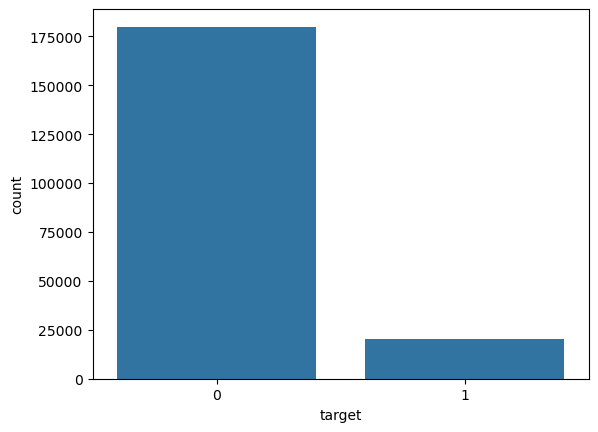

In [17]:
sns.countplot(x = 'target', data=data)

- In this plot we are clearly seen the 90% customer are did not do a transaction and 10% customer are did do the transaction.
- This target feature is imbalance so we need to balance the data with the help of oversampling.

## Checking For Distribution of First 100 Feature

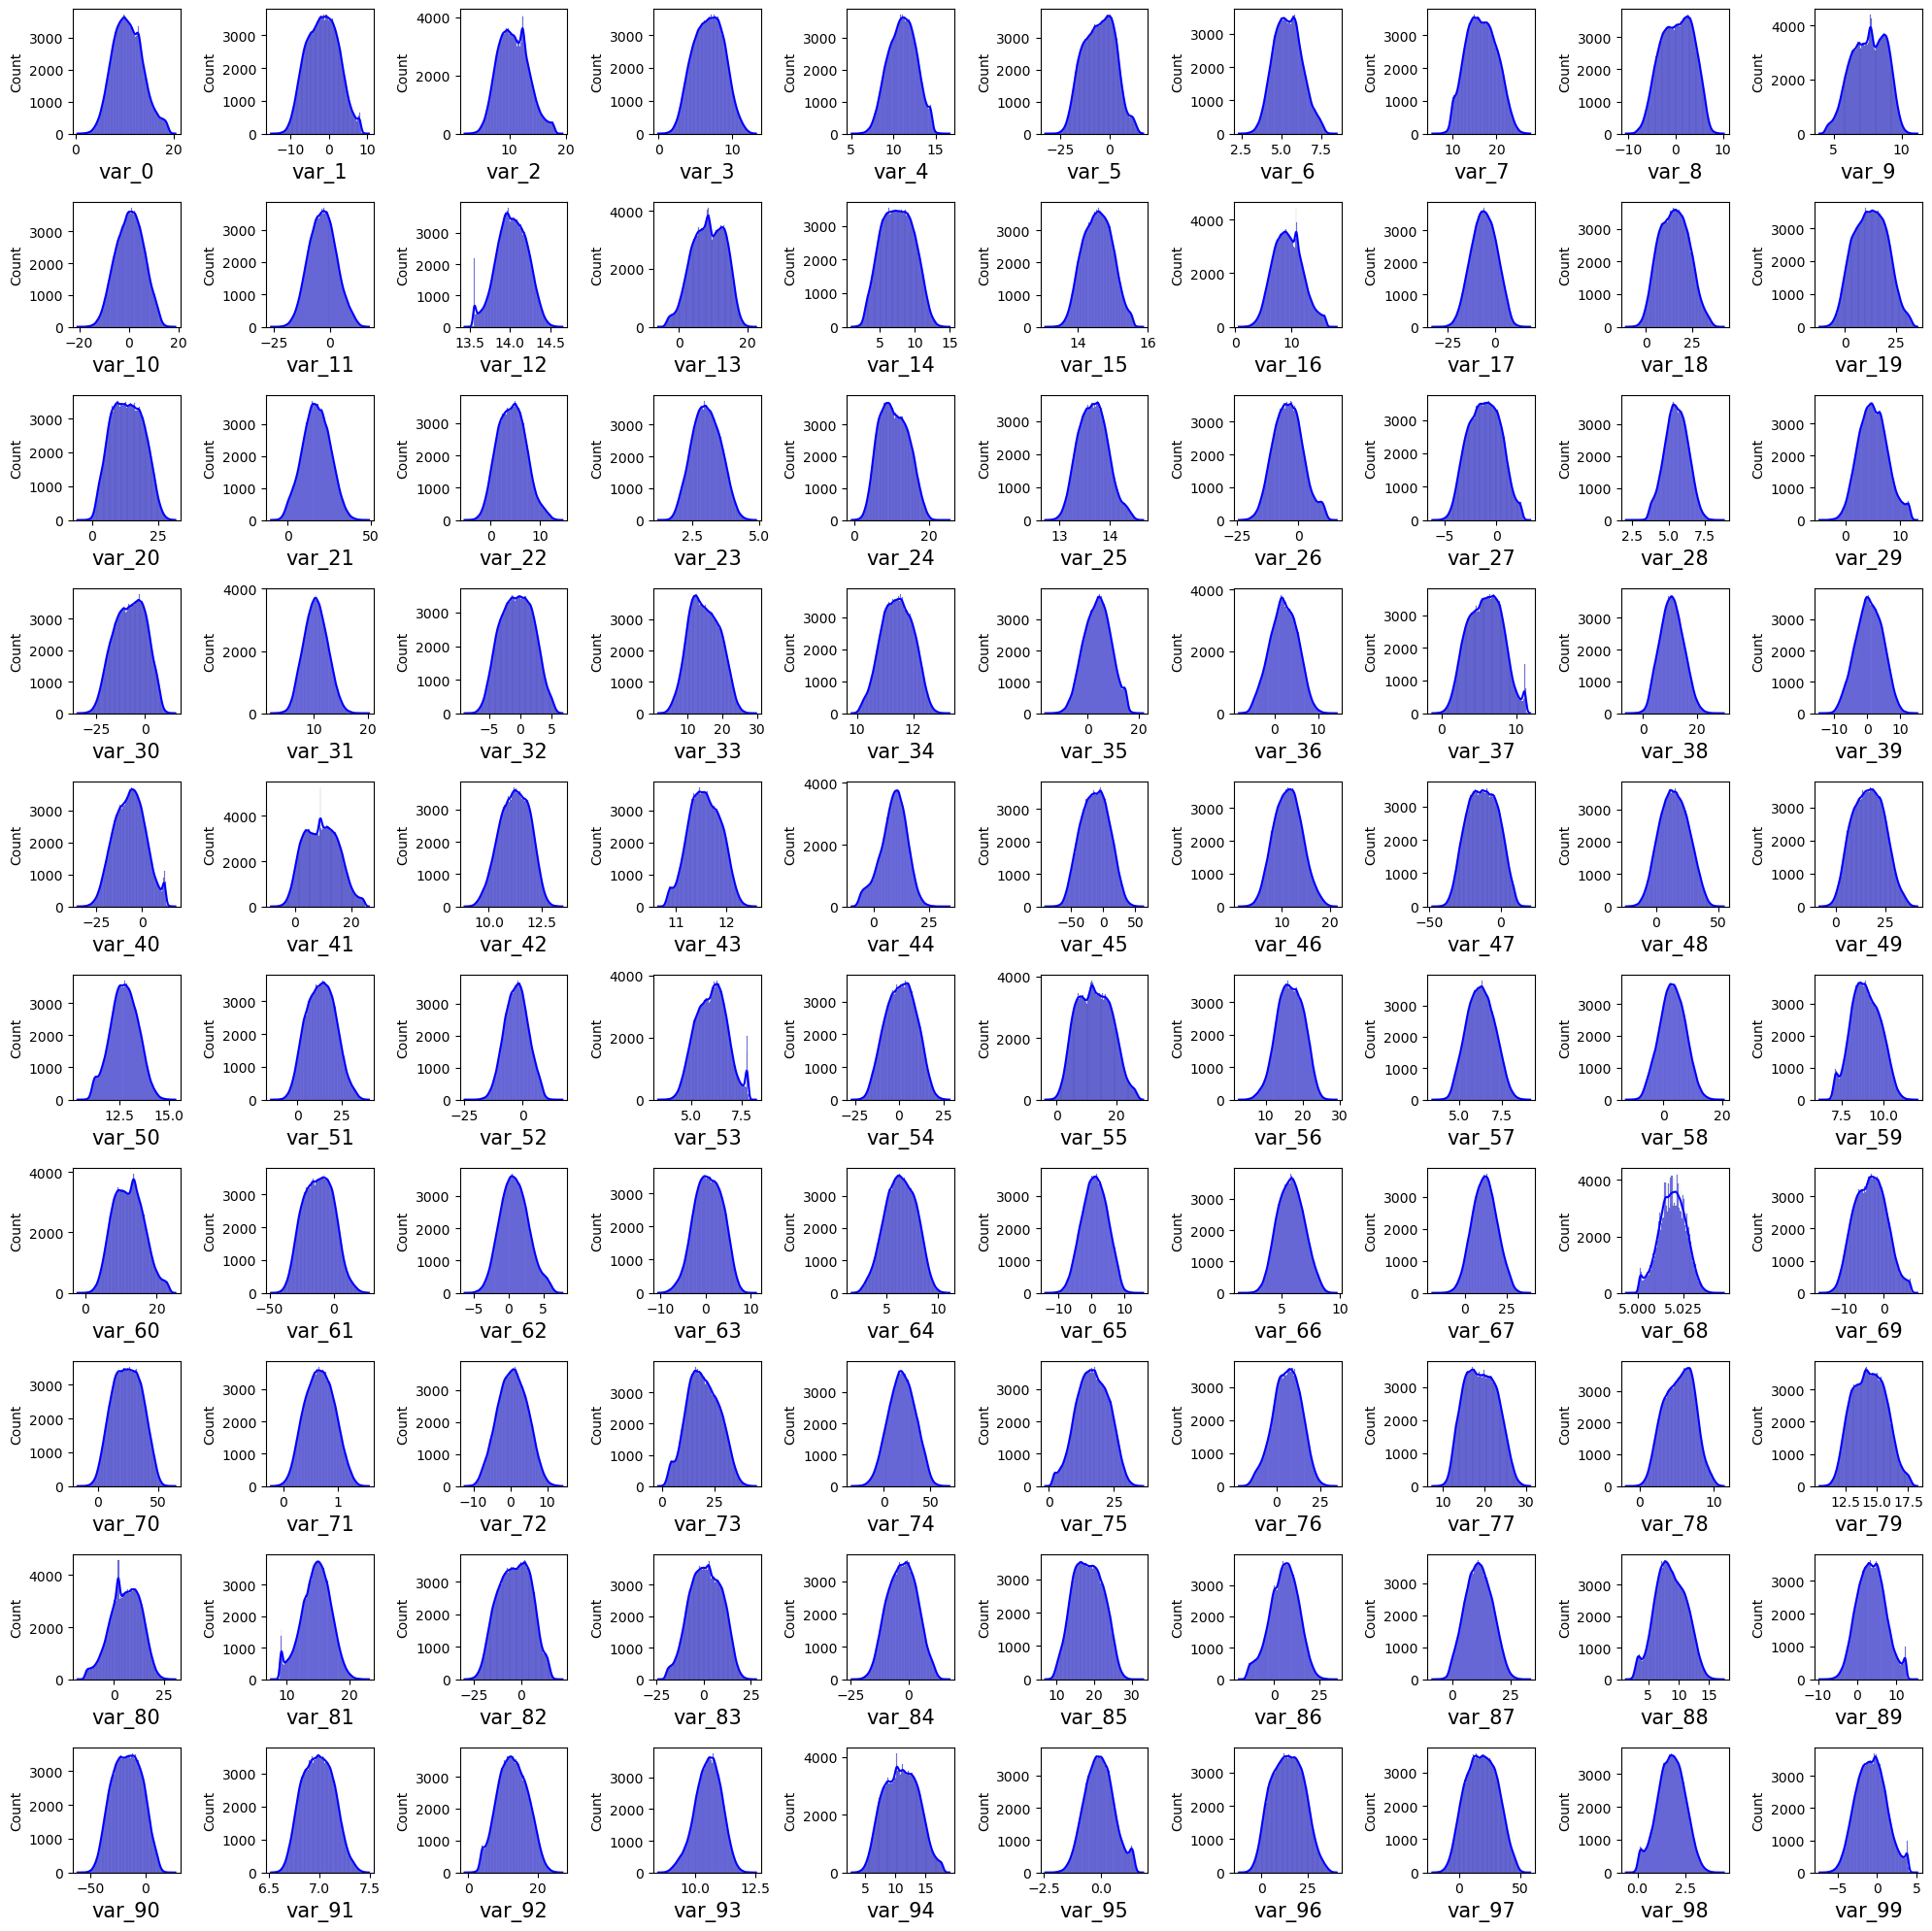

In [18]:
dist = data.iloc[:,2:102]
plt.figure(figsize=(20,20),facecolor='white') # Define canvas size
plotno = 1 # Counter
for column in dist: # Itreting the feature
    if plotno<=100: # Condition
        plt.subplot(10,10,plotno) # plotting 100 boxplot with 10 rows and 10 column
        sns.histplot(dist[column],kde=True,color='blue')
        plt.xlabel(column,fontsize=15) # name to x-axis and font size is 20
    plotno+=1
plt.tight_layout()
plt.show()

## Checking For Next Features

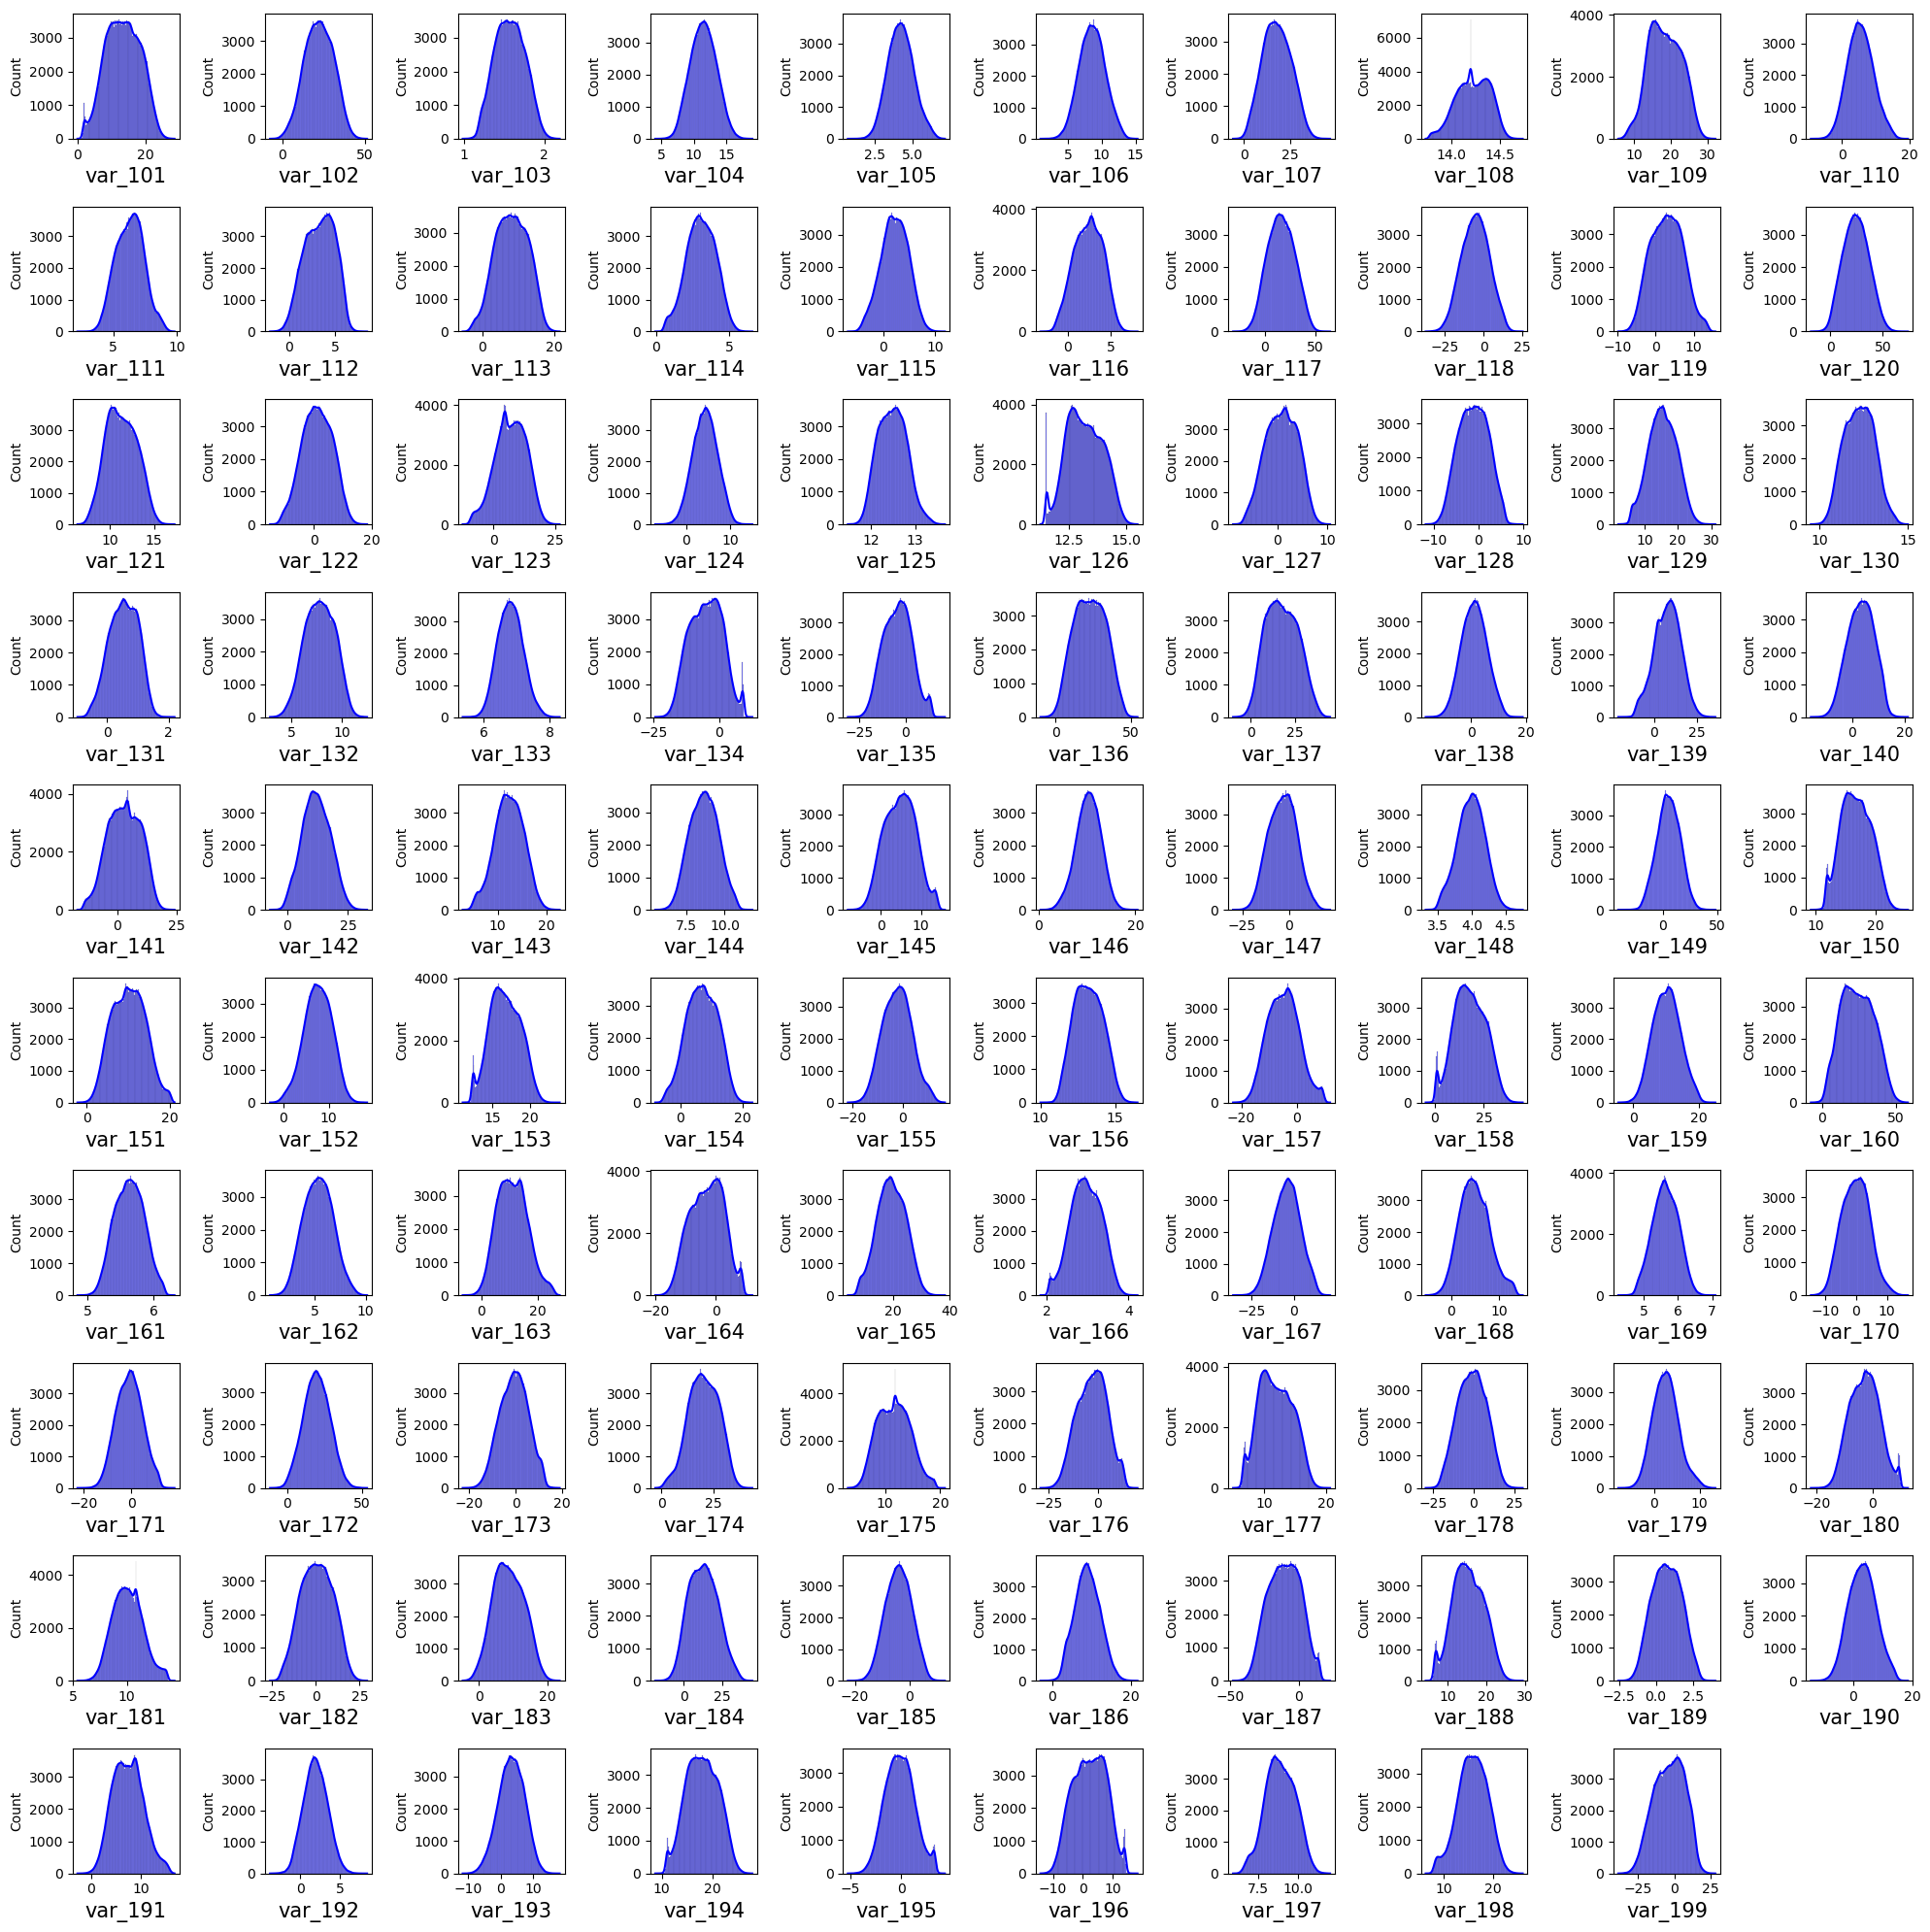

In [19]:
dist1 = data.iloc[:,103:]
plt.figure(figsize=(20,20),facecolor='white') # Define canvas size
plotno = 1 # Counter
for column in dist1: # Itreting the feature
    if plotno<=100: # Condition
        plt.subplot(10,10,plotno) # plotting 100 boxplot with 10 rows and 10 column
        sns.histplot(dist1[column],kde=True,color='blue')
        plt.xlabel(column,fontsize=15) # name to x-axis and font size is 20
    plotno+=1
plt.tight_layout()
plt.show()

## Statistical Analysis

### Distribution of Mean of the Data

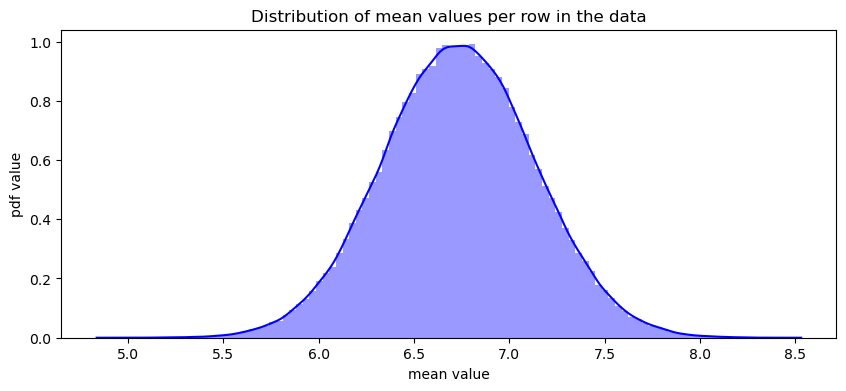

In [20]:
plt.figure(figsize=(10,4))
features = data.columns.values[1:202]
plt.title('Distribution of mean values per row in the data')
plt.xlabel('mean value')
plt.ylabel('pdf value')
sns.distplot(data[features].mean(axis=1),color='blue', kde=True,bins=100)
plt.show()

### Distribution of Standard Deviation of Data

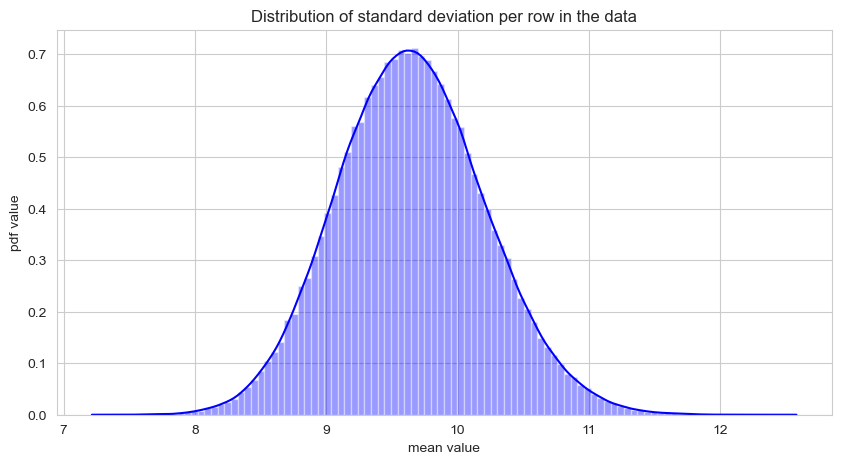

In [21]:
plt.figure(figsize = (10,5))
sns.set_style('whitegrid')
feature = data.columns.values[1:202]
plt.title("Distribution of standard deviation per row in the data")
plt.xlabel("mean value")
plt.ylabel("pdf value")
sns.distplot(data[feature].std(axis=1), color = 'blue', kde = True , bins = 100)
plt.show()

## Data Preprocessing 

### Step 1 : Drop ID_code column

In [22]:
data = data.drop(columns=['ID_code'])

### Step 2 : Separate Features and Target

In [23]:
X = data.drop(columns=['target'])  # Features
y = data['target']                 # Target variable

### Step 3 : Train/Test Split

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

### Step 4 : Confirm Split

In [25]:
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("Target distribution in training set:\n", y_train.value_counts(normalize=True))

Training set shape: (140000, 200)
Test set shape: (60000, 200)
Target distribution in training set:
 target
0    0.899507
1    0.100493
Name: proportion, dtype: float64


## Feature Scaling

In [26]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Checking For Correlation 

In [27]:
data.corr()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
target,1.000000,0.052390,0.050343,0.055870,0.011055,0.010915,0.030979,0.066731,-0.003025,0.019584,-0.042805,-0.002213,0.022993,-0.069489,-0.055156,-0.006332,0.017283,0.008117,0.000864,0.043479,0.011291,-0.018329,-0.058483,0.060558,-0.025473,0.028477,0.013328,0.062422,-0.000582,-0.023942,0.004682,0.000638,-0.025619,0.030513,-0.044334,-0.052692,0.036567,-0.038397,0.007685,0.000970,-0.004090,0.049530,-0.001298,-0.008365,-0.028557,-0.049039,-0.020065,0.005690,0.008983,0.032334,0.030612,-0.013900,0.025992,0.027754,0.063399,-0.015796,0.017176,-0.035000,-0.015468,-0.024277,-0.010448,0.006265,0.007407,0.013888,-0.014670,-0.013805,0.011214,0.023114,0.044673,-0.011957,0.008283,0.026748,0.033607,-0.013005,-0.006460,0.019926,-0.038081,-0.061917,-0.017459,0.048245,0.007591,-0.057609,-0.080917,0.022574,-0.020528,0.012363,-0.024513,-0.039126,-0.035860,-0.020677,0.039369,0.029395,0.040127,-0.046295,-0.035070,0.046296,0.038531,0.003037,0.015224,-0.004074,0.058367,0.002215,-0.009138,-0.018329,-0.001395,-0.026605,0.025604,0.032947,-0.039997,-0.044791,-0.049926,0.064275,0.026686,0.023694,-0.013681,-0.026266,-0.050174,-0.023448,0.002591,0.040358,0.030975,-0.010895,-0.039788,-0.042461,-0.040291,0.004218,0.028223,0.001393,-0.039125,0.026909,-0.005880,0.029917,-0.032380,-0.024510,0.054548,0.017213,0.027944,-0.003554,0.027190,0.018328,-0.074080,0.015301,-0.029701,-0.018901,-0.011202,0.021208,0.030917,-0.063644,0.040280,-0.055011,-0.047319,-0.025821,0.027524,-0.010773,-0.007103,-0.046106,0.037240,-0.020997,0.032642,-0.003817,0.015278,-0.005135,0.004168,0.032647,0.031811,0.040997,-0.055734,-0.057773,0.030797,0.014115,-0.048382,0.047973,0.014873,-0.037976,0.042022,-0.061669,0.021692,0.007469,-0.036863,-0.019681,0.050002,0.031190,0.013714,-0.007198,-0.005467,0.048315,0.000053,-0.030421,0.014873,-0.034015,0.009212,0.055973,0.047114,-0.042858,-0.017709,-0.022838,0.028285,0.023608,-0.035303,-0.053000,0.025434
var_0,0.052390,1.000000,-0.000544,0.006573,0.003801,0.001326,0.003046,0.006983,0.002429,0.004962,-0.002613,0.000355,0.003468,-0.001996,-0.002717,-0.004584,-0.000043,0.001112,-0.001664,0.004292,0.001505,-0.000932,0.000781,0.002322,-0.000987,0.003658,0.001158,0.006117,0.000985,0.001081,-0.000426,0.003187,-0.002097,0.000274,-0.003343,-0.003933,0.001469,-0.002556,-0.000253,-0.000470,-0.001409,0.006798,0.001152,-0.000440,0.002685,-0.003003,-0.001539,0.000129,0.004062,0.003767,0.000524,-0.004678,0.001217,0.003037,0.001259,-0.000783,-0.001055,-0.000318,-0.003824,-0.002385,-0.001962,0.002243,

## Correlation Heatmap

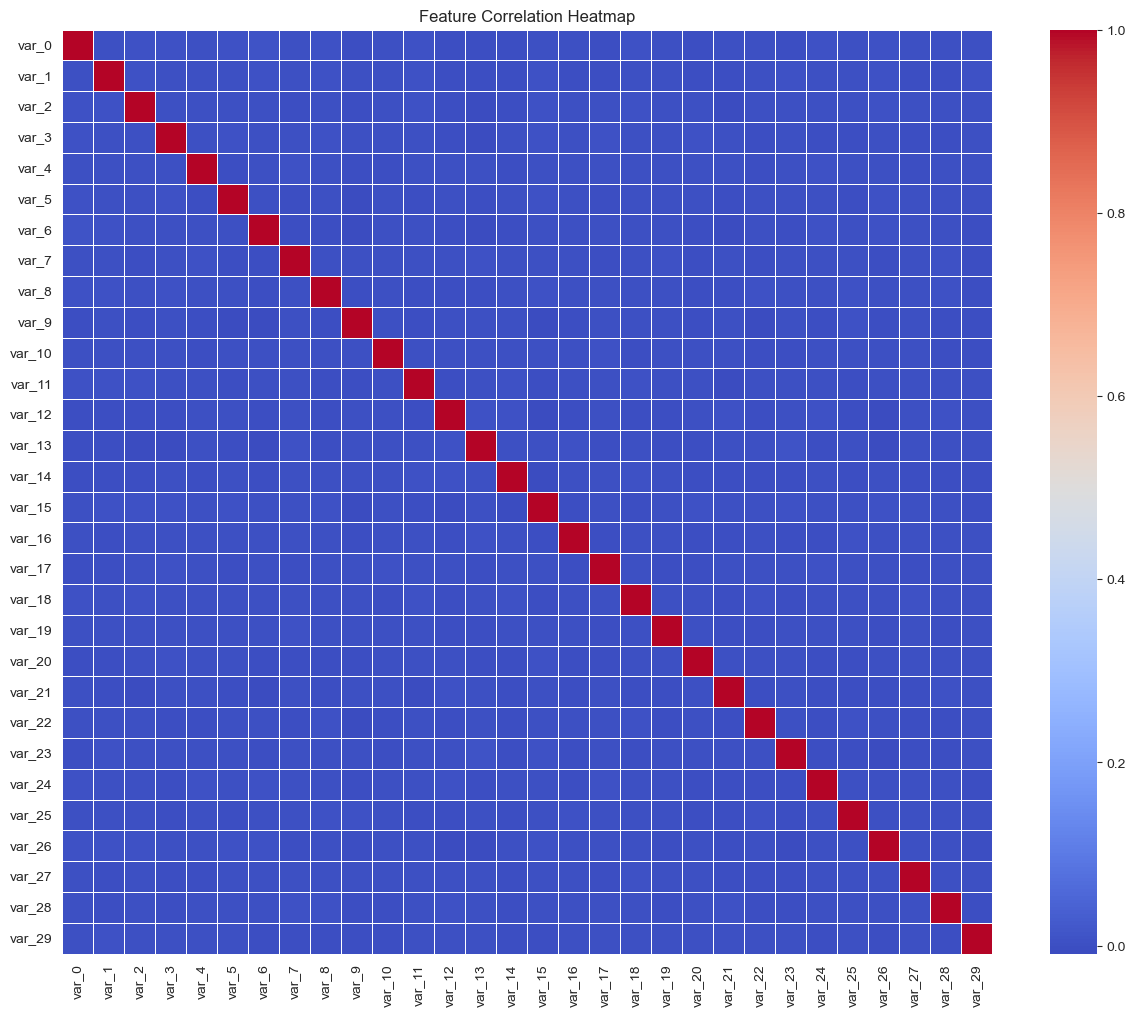

In [28]:
plt.figure(figsize=(15, 12))
corr = data.iloc[:, 1:31].corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

## Principal Component Analysis

- Reduce the feature using PCA

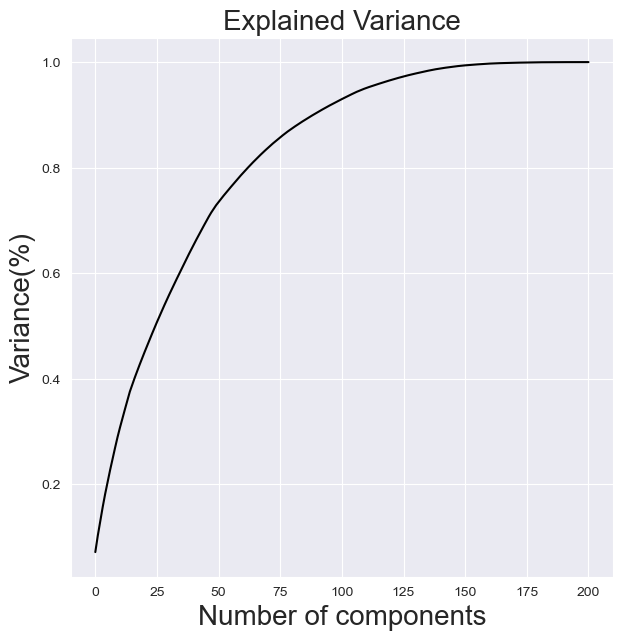

In [29]:
from sklearn.decomposition import PCA
pca = PCA()
principle_component = pca.fit_transform(data)  # Fitting the data
plt.figure(figsize=(7,7))
sns.set_style('darkgrid')
plt.plot(np.cumsum(pca.explained_variance_ratio_),color ='k')
plt.xlabel('Number of components',fontsize=20)
plt.ylabel('Variance(%)',fontsize=20) # for each componant
plt.title('Explained Variance',fontsize=20)
plt.show()

In [30]:
pca = PCA(n_components=175)
new_data = pca.fit_transform(data)
new_data

array([[  5.60649554,  23.55435339,  -1.89977242, ...,   0.53971697,
         -0.88212784,  -0.67087397],
       [-34.87800992, -11.46924231,  -3.75963731, ...,   0.12586018,
          0.79335446,  -0.68955197],
       [  4.7902677 ,   0.33416296,  11.35924774, ...,  -0.79714714,
         -0.40978126,   0.09993208],
       ...,
       [-36.84224531,  -7.76007749,  30.23225832, ...,   0.13156755,
         -0.80363738,   0.80355907],
       [-30.23088878,  24.42345414,  25.55339667, ...,  -0.60297325,
         -0.30001756,  -0.17215951],
       [  5.99491397,  -7.69718104,  10.11171895, ...,  -0.42245853,
          0.3184693 ,   0.59240999]])

In [31]:
data = pd.DataFrame(data=new_data,columns=['pca1','pca2','pca3','pca4','pca5','pca6','pca7','pca8','pca9','pca10',
                            'pca11','pca12','pca13','pca14','pca15','pca16','pca17','pca18','pca19','pca20','pca21','pca22',
                            'pca23','pca24','pca25','pca26','pca27','pca28','pca29','pca30','pca31','pca32','pca33','pca34',
                            'pca35','pca36','pca37','pca38','pca39','pca40','pca41','pca42','pca43','pca44','pca45','pca46',
                            'pca47','pca48','pca49','pca50','pca51','pca52','pca53','pca54','pca55','pca56','pca57','pca58',
                            'pca59','pca60','pca61','pca62','pca63','pca64','pca65','pca66','pca67','pca68','pca69','pca70',
                            'pca71','pca72','pca73','pca74','pca75','pca76','pca77','pca78','pca79','pca80','pca81','pca82',
                            'pca83','pca84','pca85','pca86','pca87','pca88','pca89','pca90','pca91','pca92','pca93','pca94',
                            'pca95','pca96','pca97','pca98','pca99','pca100','pca101','pca102','pca103','pca104','pca105',
                            'pca106','pca107','pca108','pca109','pca110','pca111','pca112','pca113','pca114','pca115','pca116',
                            'pca117','pca118','pca119','pca120','pca121','pca122','pca123','pca124','pca125','pca126','pca127',
                            'pca128','pca129','pca130','pca131','pca132','pca133','pca134','pca135','pca136','pca137','pca138',
                            'pca139','pca140','pca141','pca142','pca143','pca144','pca145','pca146','pca147','pca148','pca149',
                            'pca150','pca151','pca152','pca153','pca154','pca155','pca156','pca157','pca158','pca159','pca160',
                            'pca161','pca162','pca163','pca164','pca165','pca166','pca167','pca168','pca169','pca170',
                            'pca171','pca172','pca173','pca174','pca175'])
data.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15,pca16,pca17,pca18,pca19,pca20,pca21,pca22,pca23,pca24,pca25,pca26,pca27,pca28,pca29,pca30,pca31,pca32,pca33,pca34,pca35,pca36,pca37,pca38,pca39,pca40,pca41,pca42,pca43,pca44,pca45,pca46,pca47,pca48,pca49,pca50,pca51,pca52,pca53,pca54,pca55,pca56,pca57,pca58,pca59,pca60,pca61,pca62,pca63,pca64,pca65,pca66,pca67,pca68,pca69,pca70,pca71,pca72,pca73,pca74,pca75,pca76,pca77,pca78,pca79,pca80,pca81,pca82,pca83,pca84,pca85,pca86,pca87,pca88,pca89,pca90,pca91,pca92,pca93,pca94,pca95,pca96,pca97,pca98,pca99,pca100,pca101,pca102,pca103,pca104,pca105,pca106,pca107,pca108,pca109,pca110,pca111,pca112,pca113,pca114,pca115,pca116,pca117,pca118,pca119,pca120,pca121,pca122,pca123,pca124,pca125,pca126,pca127,pca128,pca129,pca130,pca131,pca132,pca133,pca134,pca135,pca136,pca137,pca138,pca139,pca140,pca141,pca142,pca143,pca144,pca145,pca146,pca147,pca148,pca149,pca150,pca151,pca152,pca153,pca154,pca155,pca156,pca157,pca158,pca159,pca160,pca161,pca162,pca163,pca164,pca165,pca166,pca167,pca168,pca169,pca170,pca171,pca172,pca173,pca174,pca175
0,5.606496,23.554353,-1.899772,-5.221582,-2.466701,-8.622201,-2.713607,15.071730,-11.416816,1.583117,-8.810591,-0.803060,-1.443877,12.482112,6.768732,15.693680,14.050966,2.355830,13.958542,-8.163061,0.768606,1.538973,-3.141053,-3.929048,5.044399,-2.780292,2.669722,3.876267,0.269426,14.926704,13.744684,14.194122,-0.751894,-4.597838,-6.769676,-15.636997,0.949923,4.723135,2.397881,7.909763,8.339617,-2.546244,-9.691232,-12.192479,-0.027625,-6.440590,15.792832,-1.257716,-7.712635,4.300648,-2.618681,8.723663,-6.251908,2.643124,4.174518,5.215633,-4.396790,-1.052333,2.970330,-3.416243,3.044457,-2.412961,7.035403,4.351336,-7.637010,3.562790,8.966016,6.353973,-8.981295,-1.655280,-7.412314,6.582364,-2.350743,-7.007008,1.258390,2.853052,-0.136596,5.947799,9.312869,-7.800246,1.253609,-0.087389,6.216675,-8.836341,-5.494905,5.250345,1.680534,-0.784933,-5.108855,3.357997,-4.689510,3.031776,-1.776089,2.129153,2.317691,-5.583667,-1.919944,0.577792,1.648345,3.404498,3.263459,2.743491,4.208738,-5.990206,4.143584,7.425475,2.982265,-5.351729,-5.418143,1.981223,-5.445265,-0.995628,2.606597,-2.519356,0.415986,-0.928304,-0.591702,4.144478,-1.239604,-3.736894,-4.101483,0.188536,-0.280063,-4.425618,-4.388345,-2.755405,-0.291860,3.827803,-0.687712,0.353106,1.719226,0.645207,1.703527,-3.150089,-3.433453,1.103352,-0.589368,2.095139,-1.006035,0.834531,2.168939,2.443887,-1.747592,1.136800,-0.273422,0.580800,3.240203,0.752707,-3.072981,-1.623411,0.182662,0.362400,0.535321,0.891440,2.349827,1.178460,1.672095,-2.246912,-1.768596,-0.989929,-2.218412,-1.774034,0.029485,0.461215,-0.429503,-0.288935,-1.124168,0.344778,-0.375811,-0.418501,1.323936,1.631616,0.539717,-0.882128,-0.670874
1,-34.878010,-11.469242,-3.759637,19.274628,8.543844,6.984826,15.539667,2.989568,-8.116614,19.065216,4.791254,11.514989,7.973371,-16.212905,-0.050779,8.579123,-8.301424,-14.261117,0.663819,-7.535503,2.165773,10.267967,-8.707698,10.308840,3.682518,-7.131908,-10.308660,-3.279346,-14.135811,1.283529,13.193883,1.496432,-3.386944,8.695723,10.821839,-1.915428,6.481994,17.120884,-17.028182,15.610319,-2.777038,13.516427,-3.862782,3.803462,1.225355,11.139647,-9.637415,11.805674,-2.635376,-10.004894,-2.278139,7.705529,1.189644,-10.615817,2.574935,8.866304,-13.167621,-8.420293,-6.622027,-7.177104,2.493783,10.485819,-5.636899,-4.780094,-6.318200,-1.553390,-1.990244,5.574002,5.971908,-5.713228,1.789507,-1.194929,7.083963,-4.805137,-0.251092,-8.465502,-4.300175,-1.805136,-1.164344,0.436805,3.418638,-3.334218,1.309546,1.419746,6.378193,-3.800542,4.781996,1.099159,0.457192,-5.081439,-5.143814,0.978020,1.556906,1.873589,4.411727,-1.639260,6.994851,3.057128,6.685175,2.244486,-0.914081,-5.651813,4.008655,-1.357341,4.540210,-0.199576,-4.966182,8.234497,2.933283,-0.479791,2.753754,1.483482,-1.419746,0.765054,-2.090752,2.306924,-1.067085,-0.330739,0.366036,-0.062674,2.251197,3.020607,0.091274,-1.556723,-4.74665

## Model Creation

### Balancing the Data

In [32]:
from collections import Counter
from imblearn.over_sampling import SMOTE # SMOTE(synthetic minority oversampling techinque)
sm = SMOTE() # obeject creation
print("unbalanced data   :  ",Counter(y))
x_smote,y_smote = sm.fit_resample(X,y)
print("balanced data:    :",Counter(y_smote))

unbalanced data   :   Counter({0: 179902, 1: 20098})
balanced data:    : Counter({0: 179902, 1: 179902})


### Split and Train Data

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_smote,y_smote,test_size =0.3,random_state=42)

In [34]:
x_train.shape

(251862, 200)

In [35]:
y_train.shape

(251862,)

## Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(x_train,y_train)

LogisticRegression()

In [37]:
y_pred = lr.predict(x_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

## Evaluation

### Testing Accuracy

In [38]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,classification_report,confusion_matrix
acc = accuracy_score(y_pred,y_test)
print("Training accuracy of Logistic regression model",acc*100)
print("Logistic regression training Classification report: \n",classification_report(y_pred,y_test))

Training accuracy of Logistic regression model 79.06560930870282
Logistic regression training Classification report: 
               precision    recall  f1-score   support

           0       0.78      0.79      0.79     53351
           1       0.80      0.79      0.79     54591

    accuracy                           0.79    107942
   macro avg       0.79      0.79      0.79    107942
weighted avg       0.79      0.79      0.79    107942



In [39]:
lr_f1_score = f1_score(y_pred , y_test)
print('f1_score' ,lr_f1_score*100 )

f1_score 79.17998802229695


- The accuracy of the model is not good. 

## Decision Tree 

In [40]:
from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier()

dec_tree.fit(x_train , y_train)

DecisionTreeClassifier()

In [41]:
dec_tree_pred = dec_tree.predict(x_test)
dec_tree_pred

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

## Evaluation 

### Testing Accuracy 

In [42]:
dec_acc = accuracy_score(y_pred,y_test)
print("Training accuracy of Logistic regression model",dec_acc*100)
print("Logistic regression training Classification report: \n",classification_report(y_pred,y_test))

Training accuracy of Logistic regression model 79.06560930870282
Logistic regression training Classification report: 
               precision    recall  f1-score   support

           0       0.78      0.79      0.79     53351
           1       0.80      0.79      0.79     54591

    accuracy                           0.79    107942
   macro avg       0.79      0.79      0.79    107942
weighted avg       0.79      0.79      0.79    107942



In [43]:
dce_tree_f1_score = f1_score(dec_tree_pred , y_test)
print('f1_score' ,dce_tree_f1_score*100 )

f1_score 77.94149011801507


## XGBClassifier

In [44]:
import xgboost

from xgboost import XGBClassifier

xgb = XGBClassifier()

xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [45]:
xgb_pred = xgb.predict(x_test)
xgb_pred

array([0, 1, 1, ..., 1, 0, 0])

## Evaluation 

### Testing Accuracy

In [46]:
xgb_acc = accuracy_score(xgb_pred,y_test)
print("Training accuracy of Logistic regression model",xgb_acc*100)
print("Logistic regression training Classification report: \n",classification_report(xgb_pred,y_test))

Training accuracy of Logistic regression model 89.57958903855774
Logistic regression training Classification report: 
               precision    recall  f1-score   support

           0       0.90      0.89      0.90     54698
           1       0.89      0.90      0.90     53244

    accuracy                           0.90    107942
   macro avg       0.90      0.90      0.90    107942
weighted avg       0.90      0.90      0.90    107942



In [47]:
xgb_f1_score = f1_score(xgb_pred , y_test)
print('f1_score' ,xgb_f1_score*100)

f1_score 89.50628801731537


- The evaluation of model is very good. 

## MLP Classifier(Multi Layer Perceptron)

In [48]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(60,3),
                      learning_rate='constant',
                      max_iter=100,
                      random_state=42)

In [49]:
model.fit(x_train,y_train)

MLPClassifier(hidden_layer_sizes=(60, 3), max_iter=100, random_state=42)

In [50]:
mlp_pred = model.predict(x_test)

## Evaluation 

### Testing Accuracy 

In [51]:
mlp_accuracy = accuracy_score(mlp_pred,y_test)
print("Testing accuracy of MLP model is:",mlp_accuracy*100)
print("Classification report of testing:"'\n',classification_report(mlp_pred,y_test))

Testing accuracy of MLP model is: 50.02501343314002
Classification report of testing:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67    107942
           1       0.00      0.00      0.00         0

    accuracy                           0.50    107942
   macro avg       0.50      0.25      0.33    107942
weighted avg       1.00      0.50      0.67    107942



In [52]:
mlp_f1_score = f1_score(mlp_pred,y_test)
print('F1 Score',mlp_f1_score*100)

F1 Score 0.0


- The MLP model predict very well.

## Observation 

- Logistic Regression model and Decision Tree score is not good.

- XGBClassifier and MLP model works very well.

- From the above we prefer the MLP model for better result of our model.

## Conclusion 

- The Customer Transaction Prediction project effectively demonstrated the application of machine learning techniques to identify potential customer transactions. 
- Among the models tested, the MLP Classifier delivered the best performance, outperforming traditional methods like Logistic Regression and Decision Tree.
- It proved to be a reliable solution for predictive analysis, highlighting the potential of AI in enhancing customer insights and supporting data-driven business decisions.